## DBSCAN Clustering

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

**DBSCAN Algorithm**
<pre>
For each object p in D
    if p is a core object and not processed then 
        C = retrieve all objects density-reachable from p 
        mark all objects in C as processed
        report C as a cluster
    else mark p as outlier
    end if
End For
</pre>

In [2]:
class DBSCAN(object):
    UN_CLASSIFIED = 0
    NOISE = -1

    UN_VISITED = 0
    VISITED = 1

    def __init__(self, eps, min_pts):
        self.eps = eps
        self.minPts = min_pts
        self.n_cluster = 1

    def fit(self, X):
        self._train(X)

    def _train(self, X):
        n = X.shape[0]
        self.labels_ = np.array([DBSCAN.UN_CLASSIFIED] * n)
        visited = DBSCAN.UN_VISITED * np.ones(n)

        left_classified, = np.where(visited == DBSCAN.UN_VISITED)
        while len(left_classified) != 0:
            x_idx = left_classified[0]

            visited[x_idx] = DBSCAN.VISITED # mark visited
            start_point = X[x_idx, :]
            n_neighbors, pts = self.get_neighbors(X, start_point)

            if n_neighbors < self.minPts:
                self.labels_[x_idx] = DBSCAN.NOISE
            else:
                self.labels_[x_idx] = self.n_cluster
                while len(pts) != 0:
                    neighor_id = pts[0]
                    pts = np.delete(pts, np.where(pts == neighor_id))
                    if visited[neighor_id] == DBSCAN.UN_VISITED:
                        visited[neighor_id] = DBSCAN.VISITED # mark visited
                        n_new_neighors, new_pts = self.get_neighbors(X, X[neighor_id])

                        if n_new_neighors >= self.minPts:
                            pts = np.concatenate((pts, new_pts), axis=None)

                    if self.labels_[neighor_id] == DBSCAN.UN_CLASSIFIED:
                        self.labels_[neighor_id] = self.n_cluster

                self.n_cluster += 1

            left_classified, = np.where(visited == DBSCAN.UN_VISITED)

    def get_neighbors(self, X, pt):
        dist = np.linalg.norm(X - pt, 2, axis=1)
        neighors = np.argsort(dist)
        count, = np.where(dist <= self.eps)
        return len(count), neighors[:len(count)]
    
    @staticmethod
    def k_nearest_neighbour(X, pt, k):
        dist = np.linalg.norm(X - pt, 2, axis=1)
        neighors = np.argsort(dist)
        k_dist = dist[neighors[k]]
        return k_dist

    @classmethod
    def plot_param_est_curve(cls, data, k_nn):
        y = sorted([DBSCAN.k_nearest_neighbour(data, pt, k_nn) for pt in data])
        # plot
        plt.plot([id_ for id_ in range(len(data))], y, marker='o')
        plt.xlabel('Points sorted according to k={} nearest neighour'.format(k_nn))
        plt.ylabel('k={} Nearest Distance'.format(k_nn))
            

In [3]:
data = pd.read_pickle('./state_clubbed_df.pickle')
data

,state,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act,other crimes,total
0,andhra pradesh,2001,35.0,84.0,0.0,57.0,7.0,22.0,12.0,0.0,6.0,47.0,270.0
1,arunachal pradesh,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,assam,2001,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
3,bihar,2001,2.0,16.0,0.0,26.0,0.0,1.0,16.0,1.0,2.0,18.0,83.0
4,chhattisgarh,2001,14.0,150.0,5.0,46.0,1.0,15.0,0.0,0.0,0.0,354.0,585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,d&n haveli,2015,2.0,2.0,0.0,14.0,0.0,2.0,0.0,0.0,0.0,2.0,35.0
523,daman & diu,2015,1.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
524,delhi,2015,54.0,927.0,3.0,6881.0,0.0,23.0,0.0,6.0,0.0,231.0,9489.0
525,lakshadweep,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [4]:
all_headers = data.columns
all_headers

Index(['state', 'year', 'murder', 'rape', 'foeticide',
       'kidnapping and abduction', 'abetment of suicide',
       'exposure and abandonment', 'procuration of minor girls',
       'selling girls for prostitution', 'prohibition of child marriage act',
       'other crimes', 'total'],
      dtype='object')

In [5]:
cols_to_norm = all_headers[2:-1]
print (cols_to_norm)

Index(['murder', 'rape', 'foeticide', 'kidnapping and abduction',
       'abetment of suicide', 'exposure and abandonment',
       'procuration of minor girls', 'selling girls for prostitution',
       'prohibition of child marriage act', 'other crimes'],
      dtype='object')


In [6]:
data[cols_to_norm] = StandardScaler().fit_transform(data[cols_to_norm])
data

,state,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act,other crimes,total
0,andhra pradesh,2001,-0.088951,-0.293383,-0.422895,-0.331227,0.899853,-0.024876,-0.085015,-0.183679,0.287960,-0.288916,270.0
1,arunachal pradesh,2001,-0.518114,-0.556170,-0.422895,-0.391738,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.386870,0.0
2,assam,2001,-0.518114,-0.556170,-0.422895,-0.372629,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.386870,18.0
3,bihar,2001,-0.493590,-0.506115,-0.422895,-0.364137,-0.281905,-0.417052,-0.041155,-0.092531,-0.198824,-0.349356,83.0
4,chhattisgarh,2001,-0.346449,-0.086907,0.247176,-0.342905,-0.113082,-0.155602,-0.216594,-0.183679,-0.442216,0.350914,585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,d&n haveli,2015,-0.493590,-0.549913,-0.422895,-0.376876,-0.281905,-0.398377,-0.216594,-0.183679,-0.442216,-0.382702,35.0
523,daman & diu,2015,-0.505852,-0.556170,-0.422895,-0.369445,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.386870,28.0
524,delhi,2015,0.144024,2.343874,-0.020852,6.913125,-0.281905,-0.006201,-0.216594,0.363206,-0.442216,0.094565,9489.0
525,lakshadweep,2015,-0.518114,-0.556170,-0.422895,-0.391738,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.384786,2.0


In [7]:
import nbimporter # library used for importing ipnb notebooks
from pca import PCA ## import pca.ipynb as module

Importing Jupyter notebook from pca.ipynb


In [8]:
n_features = len(cols_to_norm)
n_features

10

Using PCA to determine the principal components of the features

([<matplotlib.axis.XTick at 0x7f6f5affd6d0>,
 <a list of 10 Text major ticklabel objects>)

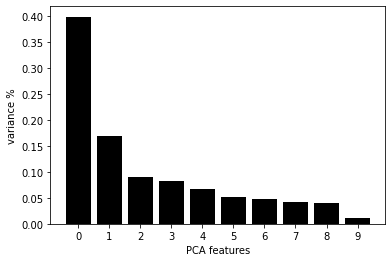

In [9]:
pca = PCA(n_components=n_features)
principal_components = pca.fit_transform(data[cols_to_norm].to_numpy())
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [10]:
PCA_components = pd.DataFrame(principal_components)
PCA_components = pd.concat([data[all_headers[:2]], PCA_components.loc[:, [0,1]]], axis=1)
PCA_components

,state,year,0,1
0,andhra pradesh,2001,-0.228578,0.050406
1,arunachal pradesh,2001,-1.230578,-0.237921
2,assam,2001,-1.224106,-0.236560
3,bihar,2001,-1.098062,0.019818
4,chhattisgarh,2001,-0.259834,-0.514825
...,...,...,...,...
522,d&n haveli,2015,-1.199630,-0.241129
523,daman & diu,2015,-1.218726,-0.236485
524,delhi,2015,3.331256,0.160154
525,lakshadweep,2015,-1.229735,-0.238179


<module 'matplotlib.pyplot' from '/home/pranjal/.local/share/virtualenvs/crime-analysis-report-pk3Cf-oK/lib/python3.7/site-packages/matplotlib/pyplot.py'>

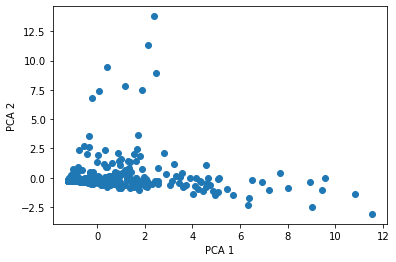

In [11]:
plt.scatter(PCA_components[0], PCA_components[1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt

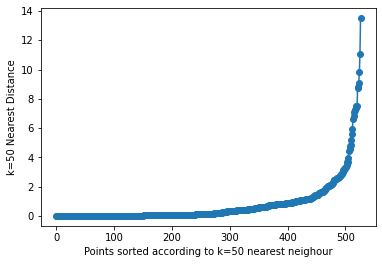

In [12]:
DBSCAN.plot_param_est_curve(PCA_components.loc[:, [0,1]].to_numpy(), 50)

In [13]:
clusterer = DBSCAN(eps=2, min_pts=50)
clusterer.fit(PCA_components.loc[:, [0,1]].to_numpy())

Text(0, 0.5, 'PCA 2')

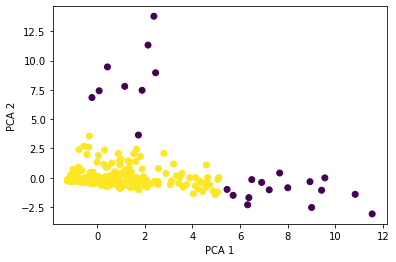

In [14]:
plt.scatter(PCA_components[0], PCA_components[1], c=clusterer.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [15]:
df_dbscan_labels = pd.concat([data[all_headers[:2]], pd.Series(clusterer.labels_)], axis=1)
df_dbscan_labels.columns = ['State', 'Year', 'Label']

In [16]:
df_dbscan_labels

,State,Year,Label
0,andhra pradesh,2001,1
1,arunachal pradesh,2001,1
2,assam,2001,1
3,bihar,2001,1
4,chhattisgarh,2001,1
...,...,...,...
522,d&n haveli,2015,1
523,daman & diu,2015,1
524,delhi,2015,1
525,lakshadweep,2015,1


In [17]:
df = pd.read_pickle('./state_clubbed_df.pickle')
concat_df = pd.concat([df, df_dbscan_labels['Label']], axis=1)
outliers = concat_df[concat_df['Label'] == -1]
outliers

,state,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act,other crimes,total,Label
202,west bengal,2006,3.0,20.0,0.0,156.0,0.0,3.0,77.0,114.0,6.0,49.0,432.0,-1
293,madhya pradesh,2009,127.0,1071.0,39.0,427.0,8.0,103.0,1.0,1.0,0.0,2869.0,4646.0,-1
328,madhya pradesh,2010,144.0,1182.0,18.0,440.0,7.0,93.0,18.0,2.0,4.0,3004.0,4912.0,-1
342,west bengal,2010,16.0,73.0,0.0,332.0,3.0,0.0,200.0,115.0,0.0,93.0,880.0,-1
363,madhya pradesh,2011,123.0,1262.0,38.0,517.0,12.0,89.0,20.0,3.0,5.0,2312.0,4381.0,-1
377,west bengal,2011,46.0,252.0,0.0,660.0,3.0,1.0,298.0,87.0,25.0,78.0,1450.0,-1
398,madhya pradesh,2012,140.0,1632.0,64.0,630.0,19.0,134.0,21.0,5.0,3.0,2520.0,5168.0,-1
399,maharashtra,2012,212.0,917.0,22.0,893.0,13.0,199.0,31.0,2.0,6.0,1157.0,3456.0,-1
410,uttar pradesh,2012,463.0,1040.0,11.0,4239.0,57.0,2.0,2.0,18.0,5.0,196.0,6033.0,-1
412,west bengal,2012,46.0,285.0,0.0,767.0,7.0,8.0,369.0,56.0,43.0,122.0,1706.0,-1


In [18]:
outliers.to_pickle('dbscan-outliers.pickle')